In [1]:
import sys
sys.path.append('..')
import os

from utils.constants import *
from utils.file_readers import *
from utils.data_exploration import *
from utils.signal_processing import *
from utils.sliding_window import *
from utils.stand_norm import *
from utils.one_vs_all_training import *
from utils.experiment_utils import *

Using TensorFlow backend.


### Visualising some results?

In [2]:
experiment_stats = pd.read_csv("../Plots/experiment_stats.csv")

In [3]:
experiment_stats

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_accuracy_valid,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test
0,00_sit_to_stand_downsample_16_all_correctness_...,Sit to stand,all,42,12,2,38,19,3,normalised,...,0.912056,0.248081,0.024233,0.067549,0.904055,0.765533,0.258383,0.035780,0.076058,0.093180
1,0_Sit_to_stand_downsample_16_balance_25_128_fi...,Sit to stand,all,42,12,2,38,19,3,normalised,...,0.157308,0.746317,0.017922,0.013474,0.159623,0.274591,0.746376,0.024368,0.035013,0.013384
2,000_Sit_to_stand_downsample_16_balance_25_128_...,Sit to stand,all,42,12,2,38,19,3,normalised,...,0.925932,0.205479,0.020597,0.056388,0.923063,0.800918,0.213091,0.035458,0.081283,0.102341
3,001_Knee_extension_downsample_16_balance_25_12...,Knee extension,all,42,12,2,38,19,3,normalised,...,0.927107,0.192441,0.018155,0.049760,0.930224,0.690850,0.190204,0.032894,0.102842,0.106835
4,002_Squats_downsample_16_balance_25_128_filters,Squats,all,42,12,2,38,19,3,normalised,...,0.881267,0.311196,0.048398,0.133806,0.893875,0.661732,0.271579,0.039560,0.091391,0.107157
5,00all_64_filters,all,all,42,12,2,38,19,3,normalised,...,0.725089,0.860731,0.041283,0.094856,0.726605,0.947329,0.857724,0.064673,0.063130,0.156454
6,01all_batch_size_64,all,all,42,12,2,38,19,3,normalised,...,0.695704,0.947230,0.037829,0.084849,0.693636,0.938413,0.942897,0.057487,0.076626,0.136513
7,00all_window_size_50_400_epochs,all,all,42,12,2,50,25,3,normalised,...,0.792394,0.654151,0.041164,0.095628,0.803456,0.959464,0.644103,0.066215,0.069602,0.183745
8,00all_window_size_62_5_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.821440,0.569039,0.045877,0.118178,0.830910,0.965301,0.552498,0.066211,0.062277,0.193410
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.810263,0.609122,0.042960,0.101629,0.815302,0.964934,0.597862,0.064730,0.062228,0.195575


In [4]:
experiment_stats.columns

Index(['experiment_name', 'activity_name', 'correctness', 'random_seed',
       'n_train_subjects', 'n_validation_subjects', 'n_time_steps', 'step',
       'n_features', 'features', 'num_filters', 'kernel_size', 'activation',
       'lr', 'batch_size', 'epochs', 'downsample_rate',
       'positive_class_weight', 'mean_accuracy_train', 'mean_loss_train',
       'std_accuracy_train', 'std_loss_train', 'mean_accuracy_valid',
       'mean_loss_valid', 'std_accuracy_valid', 'std_loss_valid',
       'mean_accuracy_test', 'mean_f1_test', 'mean_loss_test',
       'std_accuracy_test', 'std_f1_test', 'std_loss_test'],
      dtype='object')

Filter for experiments with all losoxv

In [9]:
experiment_stats_all = experiment_stats[experiment_stats['activity_name'] == 'all']

In [10]:
experiment_stats_all

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_accuracy_valid,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test
5,00all_64_filters,all,all,42,12,2,38,19,3,normalised,...,0.725089,0.860731,0.041283,0.094856,0.726605,0.947329,0.857724,0.064673,0.063130,0.156454
6,01all_batch_size_64,all,all,42,12,2,38,19,3,normalised,...,0.695704,0.947230,0.037829,0.084849,0.693636,0.938413,0.942897,0.057487,0.076626,0.136513
7,00all_window_size_50_400_epochs,all,all,42,12,2,50,25,3,normalised,...,0.792394,0.654151,0.041164,0.095628,0.803456,0.959464,0.644103,0.066215,0.069602,0.183745
8,00all_window_size_62_5_400_epochs,all,all,42,12,2,63,25,3,normalised,...,0.821440,0.569039,0.045877,0.118178,0.830910,0.965301,0.552498,0.066211,0.062277,0.193410
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.810263,0.609122,0.042960,0.101629,0.815302,0.964934,0.597862,0.064730,0.062228,0.195575


<BarContainer object of 5 artists>

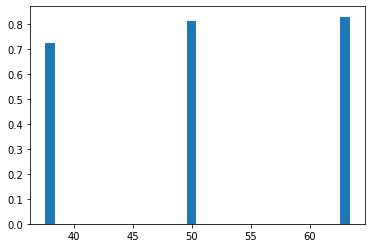

In [15]:
plt.bar(experiment_stats_all['n_time_steps'], experiment_stats_all['mean_accuracy_test'])

<BarContainer object of 5 artists>

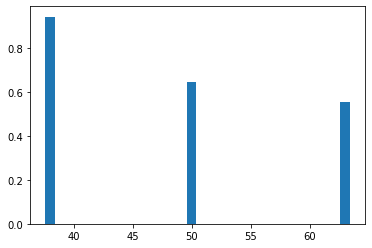

In [16]:
plt.bar(experiment_stats_all['n_time_steps'], experiment_stats_all['mean_loss_test'])

<BarContainer object of 5 artists>

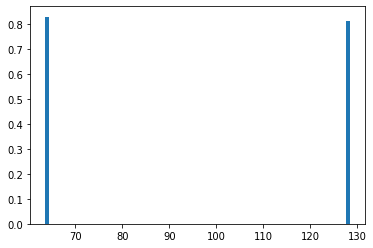

In [17]:
plt.bar(experiment_stats_all['num_filters'], experiment_stats_all['mean_accuracy_test'])

### Window size?

<ErrorbarContainer object of 3 artists>

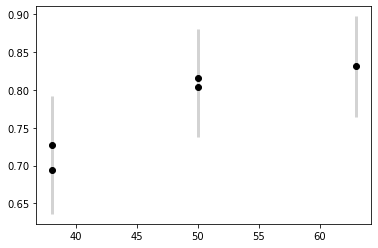

In [20]:
plt.errorbar(x=experiment_stats_all['n_time_steps'], y=experiment_stats_all['mean_accuracy_test'], 
             yerr=experiment_stats_all['std_accuracy_test'], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

Larger seems better

### Larger batch size?

<ErrorbarContainer object of 3 artists>

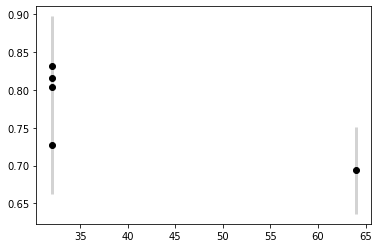

In [21]:
plt.errorbar(x=experiment_stats_all['batch_size'], y=experiment_stats_all['mean_accuracy_test'], 
             yerr=experiment_stats_all['std_accuracy_test'], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

Looks like nope

### More filters?

<ErrorbarContainer object of 3 artists>

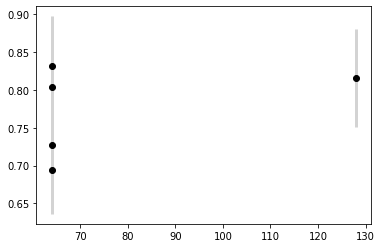

In [22]:
plt.errorbar(x=experiment_stats_all['num_filters'], y=experiment_stats_all['mean_accuracy_test'], 
             yerr=experiment_stats_all['std_accuracy_test'], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=0)

Maybe. We can try batch size of 32 and 128 filters, then batch_size 32 and 256 filters with a large window size

In [24]:
mask = (experiment_stats_all['batch_size'] == 32) & (experiment_stats_all['num_filters'] == 128)
experiment_stats_all[mask]

,experiment_name,activity_name,correctness,random_seed,n_train_subjects,n_validation_subjects,n_time_steps,step,n_features,features,...,mean_accuracy_valid,mean_loss_valid,std_accuracy_valid,std_loss_valid,mean_accuracy_test,mean_f1_test,mean_loss_test,std_accuracy_test,std_f1_test,std_loss_test
9,01all_window_size_50_128_filters,all,all,42,12,2,50,25,3,normalised,...,0.810263,0.609122,0.04296,0.101629,0.815302,0.964934,0.597862,0.06473,0.062228,0.195575
